In [1]:
## Imports 
%matplotlib inline

STRUCTURED = '/Users/maru/MyCode/structured'
DATA= 'C:/Users/mramire8/Dropbox/My Papers/Structured Reading/Code/Data/sample3_v3_merge/'
DATA= '/Users/maru/Google Drive/AAL-Experiments/empirical-study/distribution/'


import sys
import os

import numpy as np
import nltk
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl

import fnmatch
import itertools

mpl.style.use('bmh')

In [284]:
def get_result_filenames(input_dir, measure,  recursive=False, filtername=""):

    names = []

    for in_dir in input_dir:
        for path, subdirs, files in os.walk(in_dir):
            for filename in files:   
                # print fnmatch.fnmatch(filename, ""+dataset+"*"+measure+".TXT")
                # print filename, ""+dataset+"*"+measure+".TXT"
                if fnmatch.fnmatch(filename, "*"+filtername+"*"+measure+".ave.txt"):
                    names.append(os.path.join(path, filename))
            if not recursive:
                break
    return names

def load_data_results(filename):
    import csv 
    from collections import defaultdict
    results = defaultdict(lambda : [])
    header = []
    with open(filename, 'rb') as csvfile:
        sents = csv.DictReader(csvfile, delimiter='\t', quotechar='"')
        for row in sents:
            
            for k,v in row.items():
                results[k].append(float(v) * 1.)
            
    return results

def index_starts(lst, tx):
    for i,e in enumerate(lst):
        if e.startswith(tx):
            return i
    return None

def get_name_parts(fname):
    name = fname.replace("__","_").split('_')
    parts = []
    parts.append(name[1])
    mname = index_starts(name, 'm')
    parts.append(name[mname])
    return parts

def get_name(k):
    if "RND" in k.upper():
        return "RND"
    elif "LEAST" in k.upper():
        return 'UNC'
    elif k[:2] in "N0":
        return "p=-"+k[1:]
    elif k[0] in "0":
        return "p=+"+k
    else:
        return k
# for f in file_names:
# test = load_data_results(file_names[0])
    



In [208]:
file_names = get_result_filenames([DATA + "lettero/"], 'precision',recursive=False, filtername='')
lbl_names = ["-".join([get_name(k) for k in get_name_parts(name)]) for name in file_names]
print lbl_names



['p=01-RND', 'p=02-RND', 'p=03-RND', 'p=045-RND', 'p=049-RND', 'p=-01-RND', 'p=-02-RND', 'p=-03-RND', 'p=-045-RND', 'p=-049-RND', 'NODIST-RND', 'NODIST-UNC']


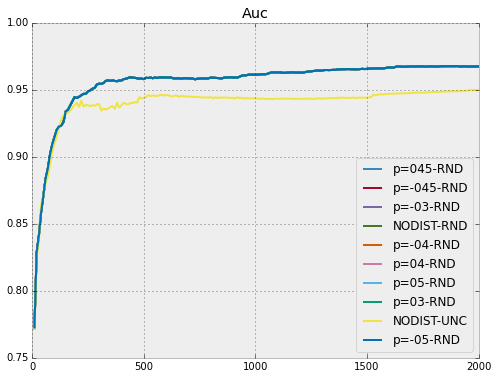

In [242]:
DATA= 'C:/Users/mramire8//Google Drive/AAL-Experiments/empirical-study/'
DATA= '/Users/maru/Google Drive/AAL-Experiments/empirical-study/'
def plot_measure(path, measure, ax=None, list_plot=None):
    file_names = get_result_filenames(path, measure,recursive=False, filtername='')
#     lbl_names = ["-".join(np.array([get_name(k) for k in name.replace("__","_").split('_')])[[1,8]]) for name in file_names]
    lbl_names = ["-".join([get_name(k) for k in get_name_parts(name)]) for name in file_names]
    results = {}
    
    for fi, na  in zip(file_names, lbl_names):
        results[na] = load_data_results(fi)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6)) 

        for k,v in results.items():
        if list_plot is not None:
            if k not in list_plot:
                continue
        if measure in ['precision','recall']:
            ax.plot(v['TrainSize'][:-1], v['AveMinC'+measure][:-1], label=k)
        else:
            ax.plot(v['TrainSize'][:-1], v['Ave'+measure][:-1], label=k)
            
#     plt.xlim([0,2000])
    ax.legend(loc='best')
    ax.set_title(measure.title())
    return ax

a = plot_measure([DATA + "letterAM-bias/"],'auc')

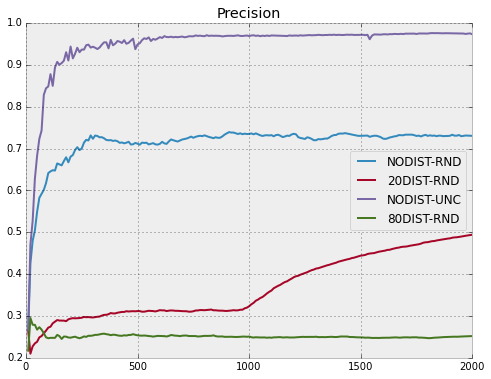

In [9]:
plot_measure([DATA + "letteram/"],'precision')

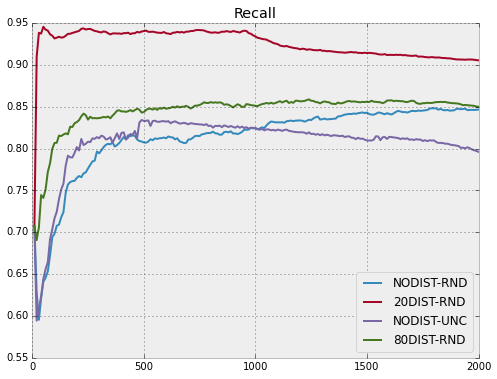

In [10]:
plot_measure([DATA + "letteram/"],'recall')

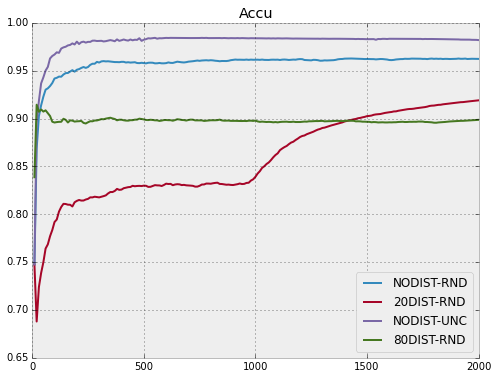

In [11]:
plot_measure([DATA + "letteram/"],'accu')

In [15]:
me = ['auc', 'precision', 'recall', 'accu']
sbp = [221,222,223,224]


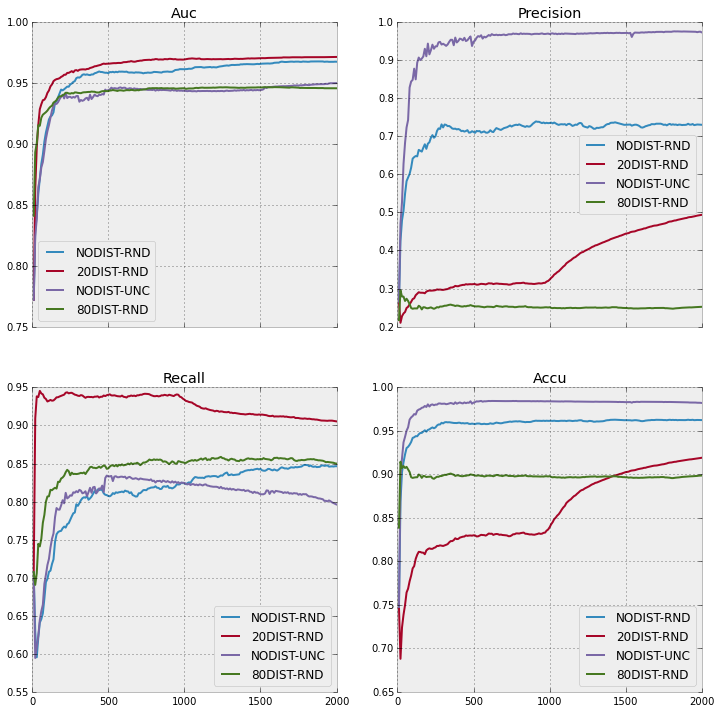

In [12]:
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    
    ax = plot_measure([DATA + "letteram/"],m, s)
plt.savefig("all_measures_dist.pdf", bbox_inches="tight", dpi=200, transparent=True)

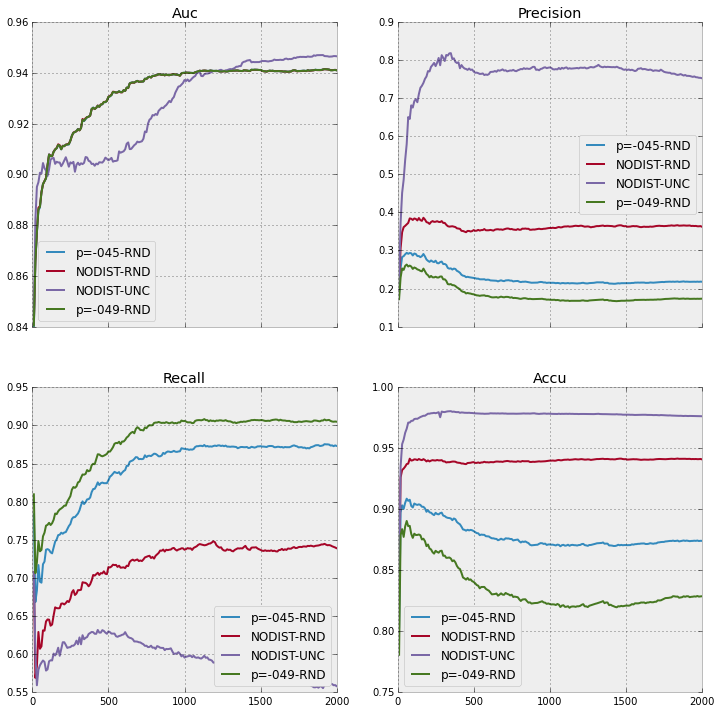

In [162]:
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    ax = plot_measure([DATA + "lettero/"],m, s)



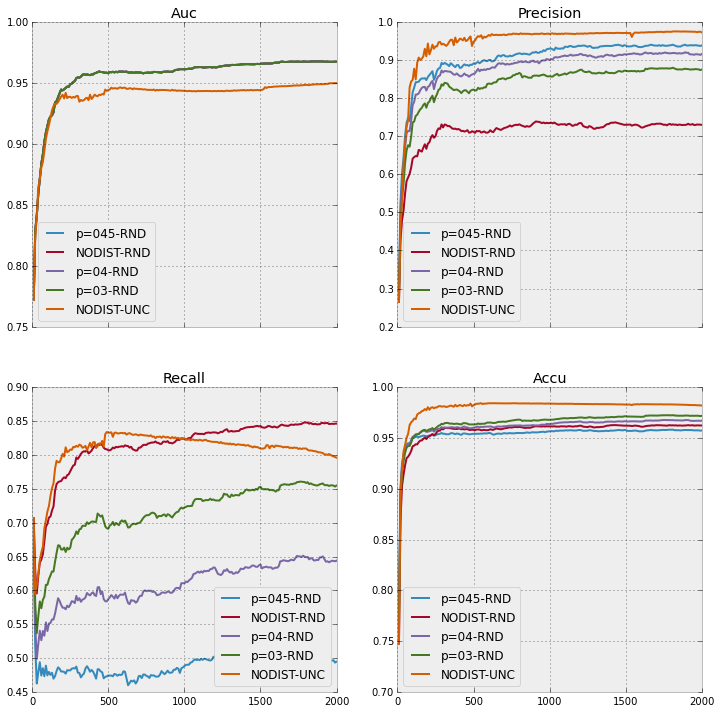

In [107]:
DATA2= '/Users/maru/Google Drive/AAL-Experiments/empirical-study/letterAM-bias/'
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    ax = plot_measure([DATA2],m, s)
plt.savefig("all_measures_threshold2.pdf", bbox_inches="tight", dpi=200, transparent=True)


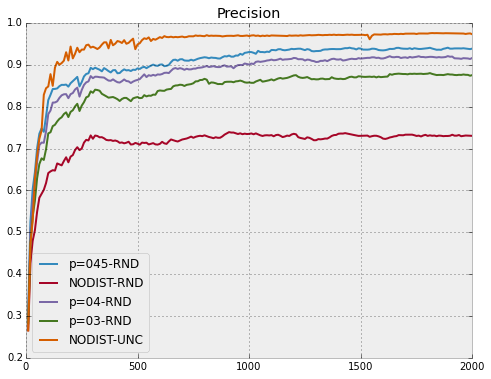

In [106]:
plot_measure([DATA2],'precision')



In [97]:

file_names = get_result_filenames([DATA2], 'recall',recursive=False, filtername='')
lbl_names = ["-".join(np.array([get_name(k) for k in name.split('_')])[[1,10]]) for name in file_names]
print lbl_names




['p=03-RND', 'p=045-RND', 'p=04-RND', 'p=05-RND', 'p=-03-RND', 'p=-045-RND', 'p=-04-RND', 'p=-05-RND', 'NODIST-RND', 'NODIST-UNC']


In [257]:
def logit(p):
    return np.exp(p)/(np.exp(p)+1)

p = [0,1]
# plt.plot(p, p+0.499)
# plt.plot(p,logit(p+.499))
# plt.plot(p,logit(p))
# plt.plot(p,logit(p-.499))
# # plt.plot(p,logit(p-0.3))
# # plt.plot(p,logit(p+0.3))

print "\n".join(["{}\t{}\t{}".format(i,1-logit(i+.499), 1-logit(i-.499)) for i in p])


0	0.377775701273	0.622224298727
1	0.182574717626	0.37730569388


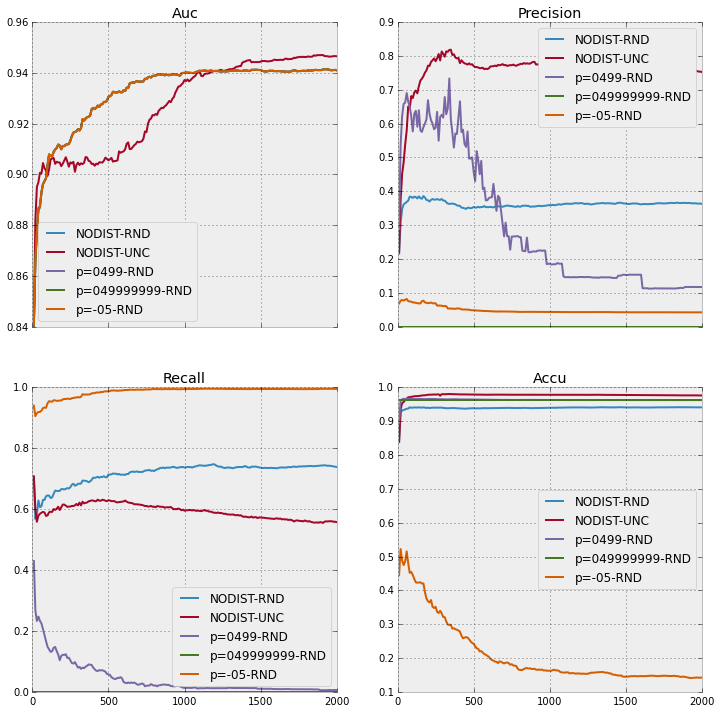

In [280]:
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    ax = plot_measure([DATA+ "lettero/"],m, s, list_plot=['NODIST-RND','NODIST-UNC','p=0499-RND','p=-05-RND','p=049999999-RND','p=049999-RND'])
plt.savefig("all_measures_lettero3.pdf", bbox_inches="tight", dpi=200, transparent=True)


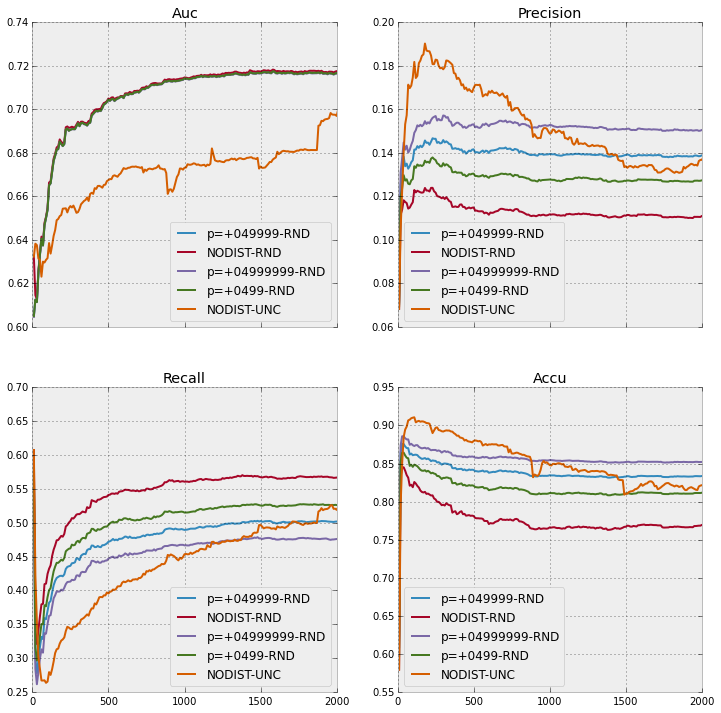

In [286]:
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    ax = plot_measure([DATA+ "zebra/"],m, s, list_plot=['NODIST-RND','NODIST-UNC','p=+0499-RND','p=+049999-RND','p=+04999999-RND'])
plt.savefig("all_measures_zebra3.pdf", bbox_inches="tight", dpi=200, transparent=True)


In [273]:
q = np.arange(0,1,0.1)
p = .5
def logit(x):
    return np.exp(x) / (np.exp(x) +1)

for x in q: 
    print "%.2f\t%.2f\t%.2f\t%.2f" % (x, x+p, logit(x+p),logit(x-p))

0.00	0.50	0.62	0.38
0.10	0.60	0.65	0.40
0.20	0.70	0.67	0.43
0.30	0.80	0.69	0.45
0.40	0.90	0.71	0.48
0.50	1.00	0.73	0.50
0.60	1.10	0.75	0.52
0.70	1.20	0.77	0.55
0.80	1.30	0.79	0.57
0.90	1.40	0.80	0.60


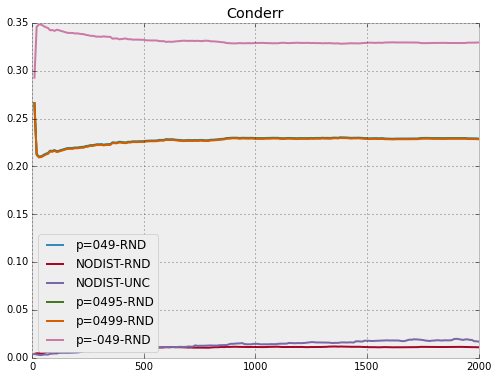

In [244]:
# file_names = get_result_filenames([DATA + "lettero/"], 'condErr',recursive=False, filtername='')
# lbl_names = ["-".join([get_name(k) for k in get_name_parts(name)]) for name in file_names]

# # print file_names
# print lbl_names
plot_measure([DATA+ "zebra/"],'f1', list_plot=['NODIST-RND','NODIST-UNC','p=+0499-RND','p=+049999-RND','p=+04999999-RND'])

plt.savefig("conderr_zebra.pdf", bbox_inches="tight", dpi=200, transparent=True)

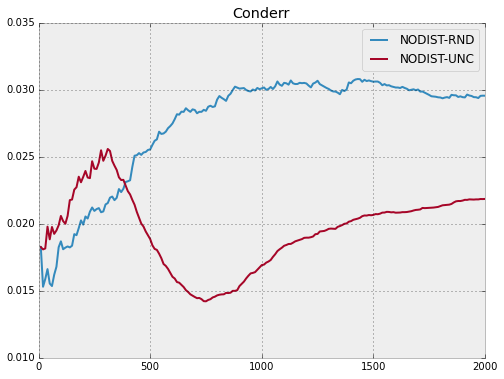

In [258]:
plot_measure([DATA+ "lettero/"],'f1', list_plot=['NODIST-RND','NODIST-UNC','p=049-RND','p=-049-RND','p=0495-RND','p=0499-RND','p=049999999-RND',])

plt.savefig("conderr_lettero.pdf", bbox_inches="tight", dpi=200, transparent=True)